# To see CCM and previous dynamical systems see dynasystem_part1
# This will apply CCM to brackets of 1800, taking the average, seeing if that improves the performance of the causal test.

# Generate the data

In [1]:
import stochpy
import numpy as np
import get_sim as gs
import matplotlib.pyplot as plt
import collections
import pickle
%matplotlib inline



np.random.seed(123)
result_file_name = "ZdirectVSZindirect_1800.p"

avg_result_file_name = "ZdirectvsZindirect_1800_avg.p"



interval= 10
time_length = 1800
index_interval = time_length/interval

C_xs = [20]
C_ys = [10]
argDict = {}
argDict['end'] = 100000
paramDict = collections.OrderedDict()
paramDict['alpha_z'] = 0.9/3600
paramDict['C_x'] = C_xs[0]
paramDict['C_y'] = C_ys[0]


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

Data written to  /Users/jlu96/v-causal-snps/data/Z->X->Y_oscill.psc_TS_data.txt_alpha_z_0e-3_C_x_2e1_C_y_1e1.txt
CPU times: user 1min 23s, sys: 911 ms, total: 1min 24s
Wall time: 1min 25s


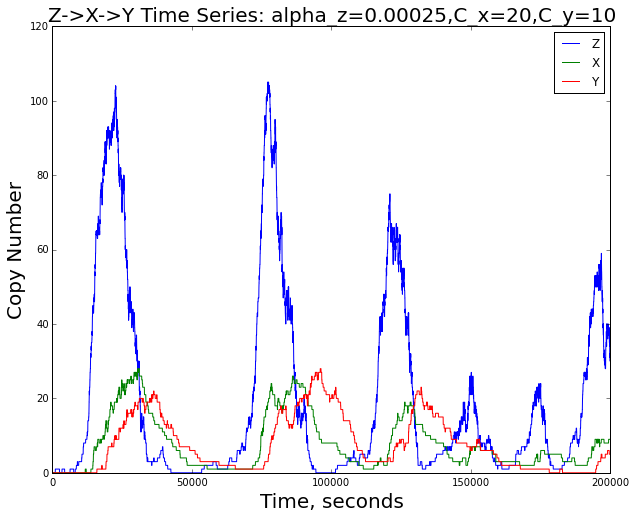

Data written to  /Users/jlu96/v-causal-snps/data/Z->X-Z->Y_oscill.psc_TS_data.txt_alpha_z_0e-3_C_x_2e1_C_y_1e1.txt
CPU times: user 1min 10s, sys: 413 ms, total: 1min 11s
Wall time: 1min 11s


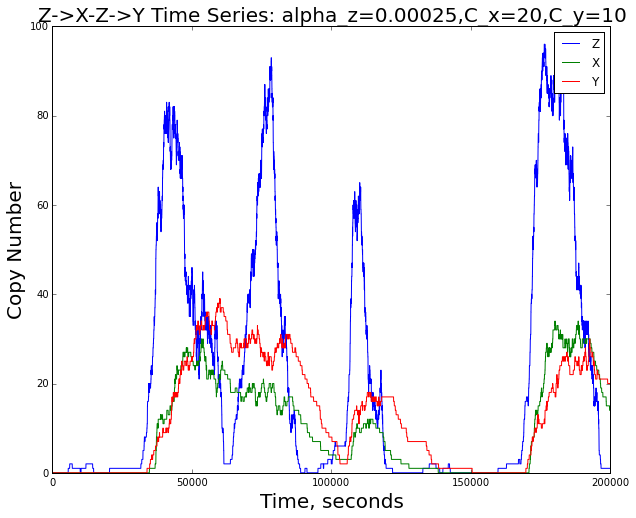

In [13]:


result_dict = {}
for C_x in C_xs:
    for C_y in C_ys:
        for model in models:

            %time smod, newdictToVector, times = gs.get_sim(model + '_oscill.psc', filedir='/Users/jlu96/v-causal-snps/code/models/', \
                                           outdir='/Users/jlu96/v-causal-snps/data/', argDict=argDict, paramDict=paramDict,\
                                           interval=interval)

            result_dict[model] = smod, newdictToVector, times

            max_time = 200000
            min_time =  0
            specieslist = ['Z', 'X', 'Y']
            time_index = np.nonzero(times > max_time)[0][0]
            min_time_index = np.nonzero(times > min_time)[0][0]
            plt.figure(figsize=(10,8))
            for species in specieslist:
                plt.plot(times[min_time_index :time_index], newdictToVector[species][min_time_index:time_index], label=species)
            plt.xlabel("Time, seconds", fontsize=20)
            plt.ylabel("Copy Number", fontsize=20)
            plt.title(model + " Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
            plt.legend()
            plt.show()


            pickle.dump(result_dict, open(result_file_name, 'wb'))


In [2]:
# Take the average value over the whole 1800 to make new timeseries
# Plot new
# perform CCM on new time series


result_dict = pickle.load(open(result_file_name, 'rB'))


avg_result_dict = {}
avg_result_dict.update(result_dict)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in greater


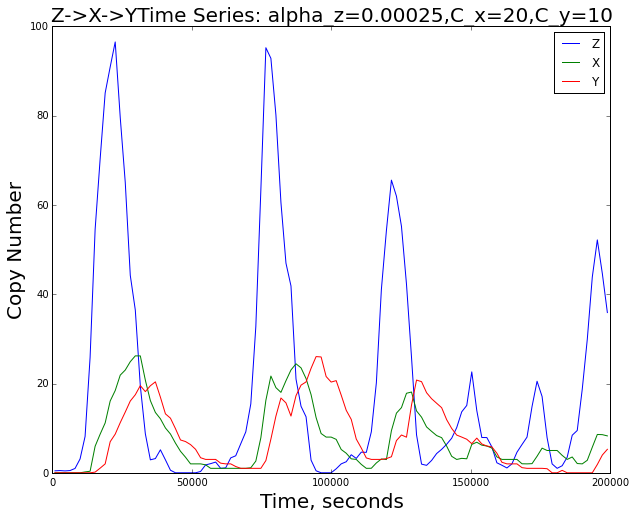

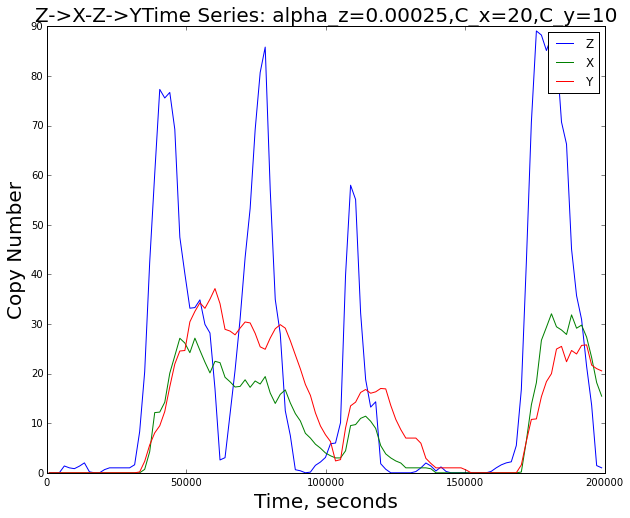

In [19]:
for model in models:
    smod, newdictToVector, times = result_dict[model]
    
    
    new_newdictToVector = {}
    for key in newdictToVector:
        value = newdictToVector[key]
        split_value = np.split(value, np.arange(0, len(times), index_interval))
        new_newdictToVector[key] = np.array([np.sum(split_val) * 1.0 /np.shape(split_val)[0] for split_val in split_value])
        
    
    split_times = np.split(times, np.arange(0, len(times), index_interval))
    new_times = np.array([np.sum(split_time) * 1.0 /np.shape(split_time)[0] for split_time in split_times])
    
    avg_result_dict[model] = smod, new_newdictToVector, new_times
    
    
    max_time = 200000
    min_time =  0
    specieslist = ['Z', 'X', 'Y']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species)
    plt.xlabel("Time, seconds", fontsize=20)
    plt.ylabel("Copy Number", fontsize=20)
    plt.title(model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
    plt.legend()
    plt.show()
    

    pickle.dump(avg_result_dict, open(avg_result_file_name, 'wb'))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


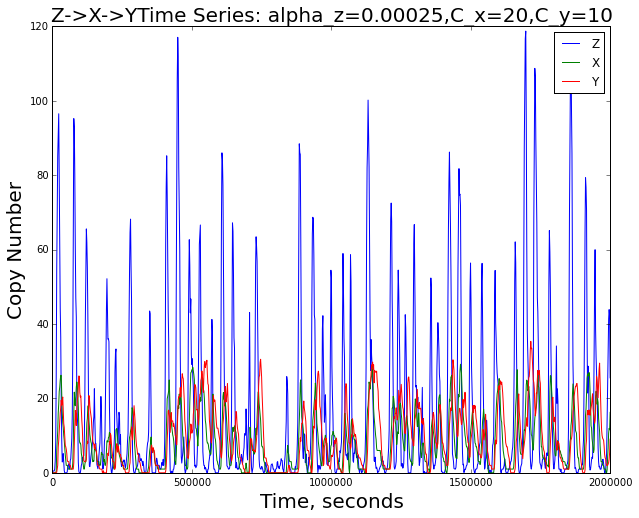

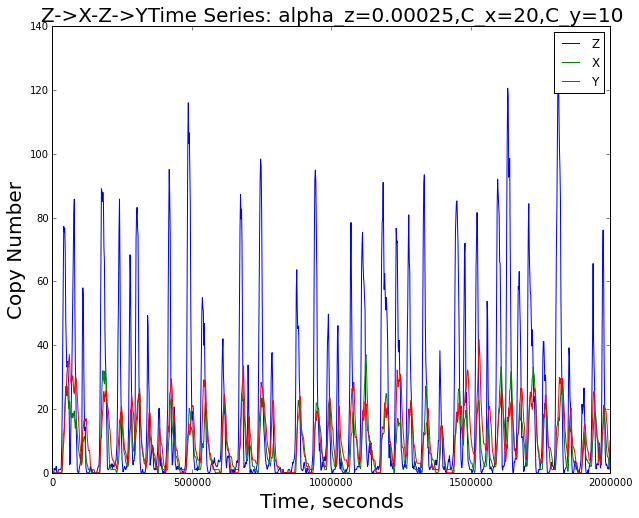

In [20]:
for model in models:
    smod, new_newdictToVector, new_times  = avg_result_dict[model] 
    max_time = 2000000
    min_time =  0
    specieslist = ['Z', 'X', 'Y']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species)
    plt.xlabel("Time, seconds", fontsize=20)
    plt.ylabel("Copy Number", fontsize=20)
    plt.title(model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
    plt.legend()
    plt.show()

In [58]:

CCM_avg_result_name = "CCM_ZdirectvsZindirect_tau1_E_5.p"

models = ["Z->X->Y", "Z->X-Z->Y"]
Ls = np.arange(6, 100, 1)
rand_state = 123
num_test = 1000
taus = np.arange(1,2)
Es = np.arange(5, 6)
model_start_times = [0, 30000]

In [59]:
import pickle
import os
import time
import collections

avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))




CCM_avg_results = []

for i in range(len(models)):
    model = models[i]
    model_start_time = model_start_times[i]
    smod, newdictToVector, times = avg_result_dict[model]

    X = newdictToVector['X']
    Y = newdictToVector['Y']
    Z = newdictToVector['Z']

    start_index = min(np.where(times > model_start_time)[0])
    
    times = times[start_index:]
    X = X[start_index:]
    Y = Y[start_index:]
    Z = Z[start_index:]
    

    gene_tuples = [(X, 'X'), (Y, 'Y'), (Z, 'Z')]


    np.random.seed(rand_state)
    test_indices = np.random.choice(np.arange(max(Ls), len(times)), num_test, replace=False)
    
    
    for i in range(len(gene_tuples)):
        gene_tuple = gene_tuples[i]
        other_gene_tuples = gene_tuples[:]

        
        del other_gene_tuples[i]

        for other_gene_tuple in other_gene_tuples:
            gene, name = gene_tuple
            other_gene, other_genename = other_gene_tuple

            t = time.time()
            for tau in taus:
                for E in Es:
                    rhos, Ls = get_CCM_complete(gene, other_gene, Ls, tau=tau, E=E, test_indices=test_indices)

                    avg_result = (name, other_genename, model, tau, E, rhos, Ls)

                    print "For ", avg_result[0:5], "max rho is ", max(rhos), "for L = ", Ls[rhos.index(max(rhos))]


                    CCM_avg_results.append(avg_result)

                        # (output, predictor, type, L, tau, E)

                    pickle.dump(CCM_avg_results, open(CCM_avg_result_name, 'wb'))
           
        
            print "Time used for one run: ", time.time() - t
            os.system("say 'finished one run'")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


For  ('X', 'Y', 'Z->X->Y', 1, 5) max rho is  0.893220529137 for L =  57
Time used for one run:  11.022300005
For  ('X', 'Z', 'Z->X->Y', 1, 5) max rho is  0.814534166568 for L =  76
Time used for one run:  11.0039680004
For  ('Y', 'X', 'Z->X->Y', 1, 5) max rho is  0.799780343139 for L =  31
Time used for one run:  9.71837592125
For  ('Y', 'Z', 'Z->X->Y', 1, 5) max rho is  0.56611665715 for L =  84
Time used for one run:  8.7926800251
For  ('Z', 'X', 'Z->X->Y', 1, 5) max rho is  0.870177306747 for L =  55
Time used for one run:  8.25346803665
For  ('Z', 'Y', 'Z->X->Y', 1, 5) max rho is  0.618648984884 for L =  56
Time used for one run:  9.12301397324
For  ('X', 'Y', 'Z->X-Z->Y', 1, 5) max rho is  0.808588519397 for L =  98
Time used for one run:  9.12683606148
For  ('X', 'Z', 'Z->X-Z->Y', 1, 5) max rho is  0.722456316132 for L =  97
Time used for one run:  9.04202485085
For  ('Y', 'X', 'Z->X-Z->Y', 1, 5) max rho is  0.823501487655 for L =  94
Time used for one run:  9.83028888702
For  ('

# Plot the CCM

In [60]:
paramDict = collections.OrderedDict()
paramDict['alpha_z'] = 0.9/3600
paramDict['C_x'] = 20
paramDict['C_y'] = 10


genes = ['X', 'Y', 'Z']
plot_Ls = [6, 30, 54, 78]
max_time = 250000

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in greater


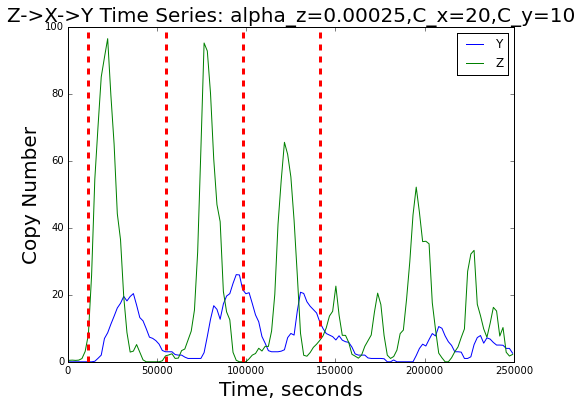

num matching results is  1


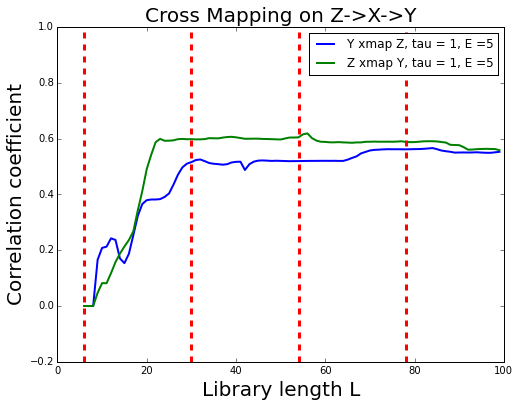

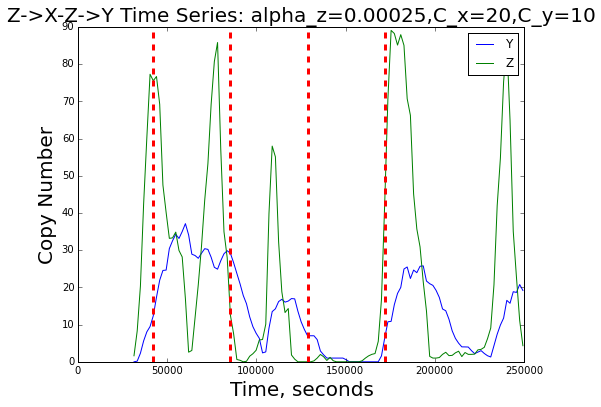

num matching results is  1


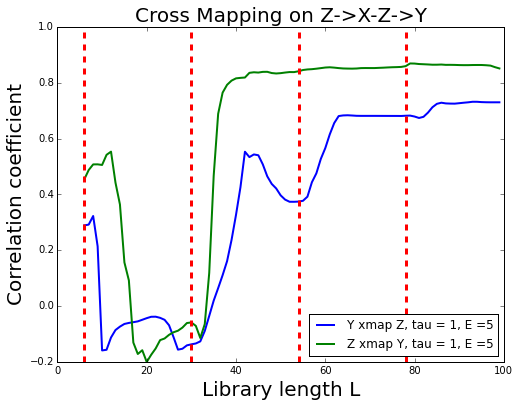

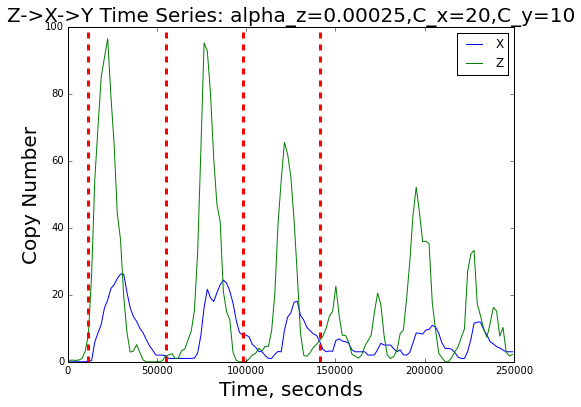

num matching results is  1


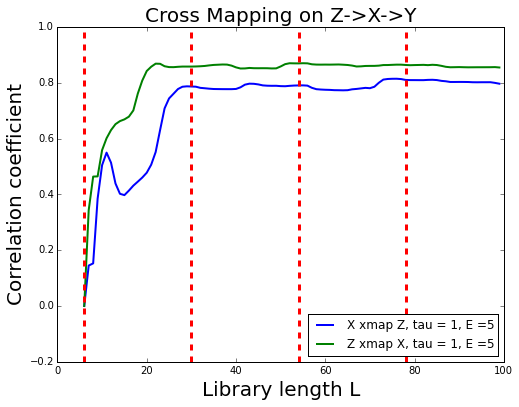

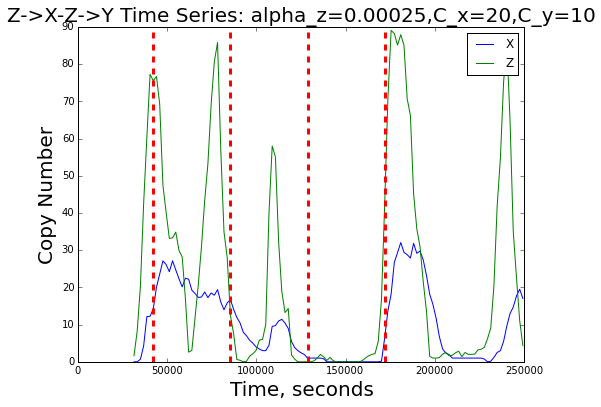

num matching results is  1


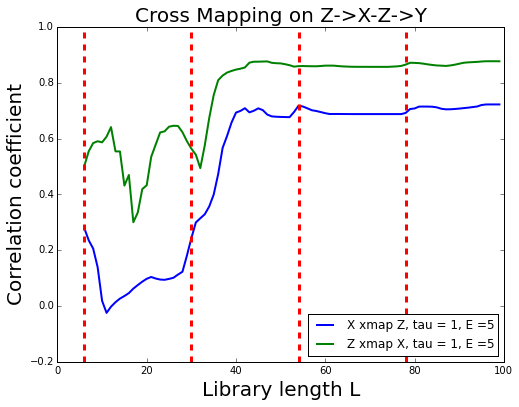

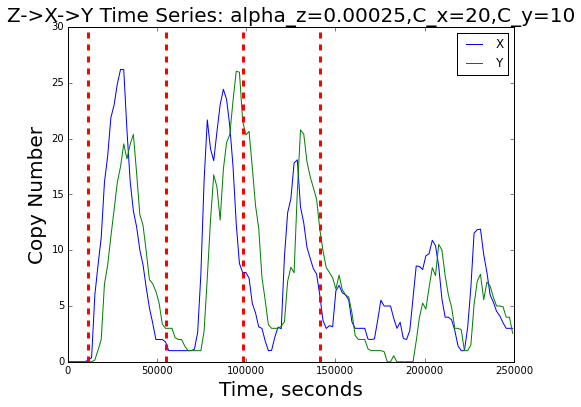

num matching results is  1


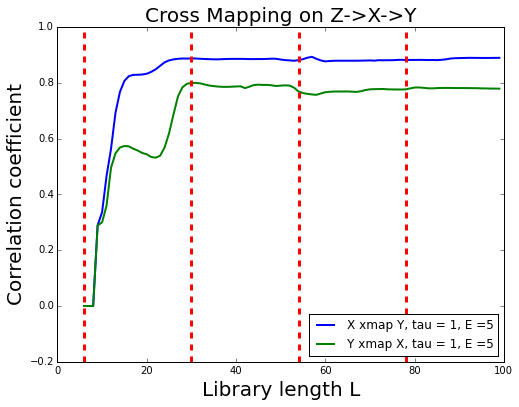

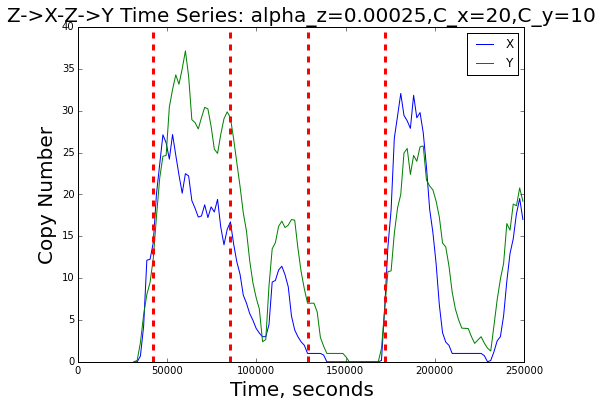

num matching results is  1


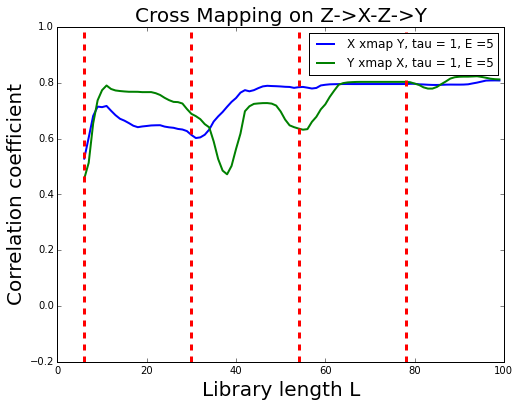

In [61]:
# Plot: CCM convergence for just each

# For each X, Y pair
# for each model
# plot the original time series
# plot both directions of the CCM

import collections
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))

CCM_results = pickle.load(open(CCM_avg_result_name, 'rb'))

# Copying previous parameters, ONLY FOR NAMING THE FIGURES



for i in range(len(genes)):
    gene_pair = genes[:]
    del gene_pair[i]


    for i in range(len(models)):
        model = models[i]
        

        
        smod, newdictToVector, times = avg_result_dict[model]
        # plot the original thing

        min_time =  model_start_times[i]
       
        specieslist = gene_pair
        time_index = np.nonzero(times > max_time)[0][0]
        min_time_index = np.nonzero(times > min_time)[0][0]
        plt.figure(figsize=(8,6))
        for species in specieslist:
            plt.plot(times[min_time_index :time_index], newdictToVector[species][min_time_index:time_index], label=species)
        for plot_L in plot_Ls:
            plt.axvline(times[min_time_index + plot_L], color='r', ls = '--', linewidth=3)
            
        plt.xlabel("Time, seconds", fontsize=20)
        plt.ylabel("Copy Number", fontsize=20)
        plt.title(model + " Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
        plt.legend()
        plt.show()

            # PLOT BOTH DIRECTIONS OF CCM


        avg_result_1 = [g for g in CCM_results if g[0] == gene_pair[0] and g[1] == gene_pair[1] and g[2] == model]
        avg_result_2 = [g for g in CCM_results if g[0] == gene_pair[1] and g[1] == gene_pair[0] and g[2] == model]

        print "num matching results is ", len(avg_result_1)

        plt.figure(figsize=(8,6))
        
        Ls_1 = avg_result_1[0][6]
        rhos_1 = avg_result_1[0][5]
        Ls_2 = avg_result_2[0][6]
        rhos_2 = avg_result_2[0][5]
        plt.plot(Ls_1, rhos_1, color='blue', linewidth=2, label = gene_pair[0] + " xmap " + gene_pair[1] + ", tau = " + str(avg_result_1[0][3]) + ", E =" + str(avg_result_1[0][4]))
        plt.plot(Ls_2, rhos_2, color='green', linewidth=2, label= gene_pair[1] + " xmap " + gene_pair[0] + ", tau = " + str(avg_result_2[0][3]) + ", E =" + str(avg_result_2[0][4]))
        for plot_L in plot_Ls:
            plt.axvline(plot_L, color='r', ls = '--', linewidth=3)
        plt.xlabel("Library length L", fontsize=20)
        plt.ylabel("Correlation coefficient", fontsize =20)
        plt.title("Cross Mapping on " + model, fontsize=20)
        plt.legend(loc='best')
        plt.ylim(-0.2, 1)
        plt.show()




# Save the avg result file to time series file

In [17]:
avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))

print avg_result_dict.keys()

models = avg_result_dict.keys()

['Z->X->Y', 'Z->X-Z->Y']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


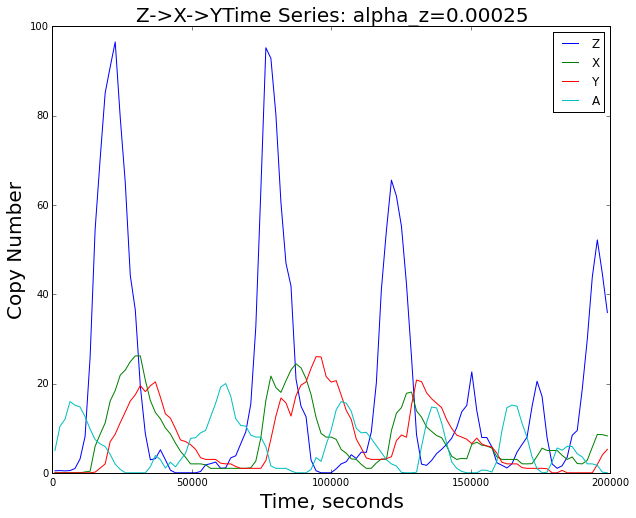

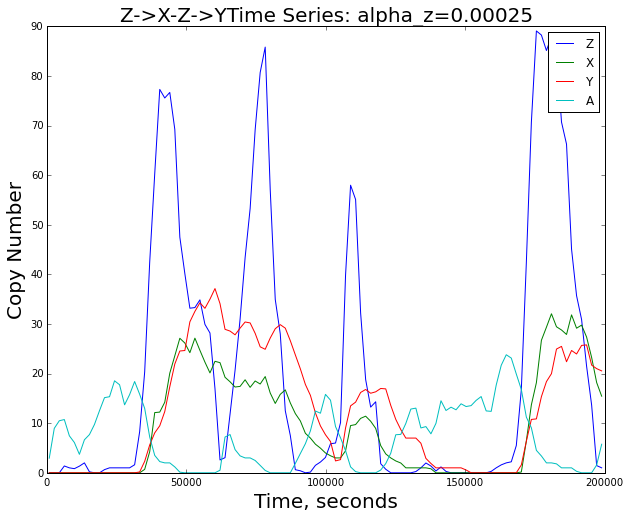

In [18]:

for model in models:
    smod, new_newdictToVector, new_times = avg_result_dict[model]
    
    max_time = 200000
    min_time =  0
    specieslist = ['Z', 'X', 'Y', 'A']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species)
    plt.xlabel("Time, seconds", fontsize=20)
    plt.ylabel("Copy Number", fontsize=20)
    plt.title(model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
    plt.legend()
    plt.show()

# Save to matlab file

In [16]:
import scipy.io as io

# convert the gene expressions to 3 genes by # time points

max_time = 200000

genes = ['Z', 'X', 'Y', 'A']

for model in models:
    smod, new_newdictToVector, new_times = avg_result_dict[model]
    
    print model
    out_file_name = '/Users/jlu96/v-causal-snps/data/expression_ZXYA_' + str(max_time) + '_' + model

    matr = np.vstack((new_newdictToVector[gene][np.where(new_times < max_time)] for gene in genes))
    print matr.shape


    io.savemat(file_name=out_file_name, mdict={'expression': matr})

Z->X->Y
(4, 111)
Z->X-Z->Y
(4, 111)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less


# Run CCM between A and Z

In [21]:

CCM_avg_result_name = "CCM_ZXYA_tau1_E_5.p"

models = ["Z->X->Y", "Z->X-Z->Y"]
Ls = np.arange(6, 100, 1)
rand_state = 123
num_test = 1000
taus = np.arange(1,2)
Es = np.arange(5, 6)
model_start_times = [0, 30000]

In [24]:
import pickle
import os
import time
import collections

avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))




CCM_avg_results = []

for i in range(len(models)):
    model = models[i]
    model_start_time = model_start_times[i]
    smod, newdictToVector, times = avg_result_dict[model]

    X = newdictToVector['X']
    Y = newdictToVector['Y']
    Z = newdictToVector['Z']
    A = newdictToVector['A']

    start_index = min(np.where(times > model_start_time)[0])
    
    times = times[start_index:]
    X = X[start_index:]
    Y = Y[start_index:]
    Z = Z[start_index:]
    A = A[start_index:]

    gene_tuples = [(X, 'X'), (Y, 'Y'), (Z, 'Z'), (A, 'A')]


    np.random.seed(rand_state)
    test_indices = np.random.choice(np.arange(max(Ls), len(times)), num_test, replace=False)
    
    
    for i in range(len(gene_tuples)):
        gene_tuple = gene_tuples[i]
        other_gene_tuples = gene_tuples[:]

        
        del other_gene_tuples[i]

        for other_gene_tuple in other_gene_tuples:
            gene, name = gene_tuple
            other_gene, other_genename = other_gene_tuple

            t = time.time()
            for tau in taus:
                for E in Es:
                    rhos, Ls = get_CCM_complete(gene, other_gene, Ls, tau=tau, E=E, test_indices=test_indices)

                    avg_result = (name, other_genename, model, tau, E, rhos, Ls)

                    print "For ", avg_result[0:5], "max rho is ", max(rhos), "for L = ", Ls[rhos.index(max(rhos))]


                    CCM_avg_results.append(avg_result)

                        # (output, predictor, type, L, tau, E)

                    pickle.dump(CCM_avg_results, open(CCM_avg_result_name, 'wb'))
           
        
            print "Time used for one run: ", time.time() - t
            os.system("say 'finished one run'")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2558: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


For  ('X', 'Y', 'Z->X->Y', 1, 5) max rho is  0.893220529137 for L =  57
Time used for one run:  10.1635739803
For  ('X', 'Z', 'Z->X->Y', 1, 5) max rho is  0.814534166568 for L =  76
Time used for one run:  10.708605051
For  ('X', 'A', 'Z->X->Y', 1, 5) max rho is  0.680897291039 for L =  13
Time used for one run:  10.4176061153
For  ('Y', 'X', 'Z->X->Y', 1, 5) max rho is  0.799780343139 for L =  31
Time used for one run:  8.87294602394
For  ('Y', 'Z', 'Z->X->Y', 1, 5) max rho is  0.56611665715 for L =  84
Time used for one run:  8.94031596184
For  ('Y', 'A', 'Z->X->Y', 1, 5) max rho is  0.544259683617 for L =  73
Time used for one run:  9.36671710014
For  ('Z', 'X', 'Z->X->Y', 1, 5) max rho is  0.870177306747 for L =  55
Time used for one run:  10.323597908
For  ('Z', 'Y', 'Z->X->Y', 1, 5) max rho is  0.618648984884 for L =  56
Time used for one run:  10.241245985
For  ('Z', 'A', 'Z->X->Y', 1, 5) max rho is  0.79346492003 for L =  23
Time used for one run:  11.7468469143
For  ('A', 'X',

# Plot the CCM

In [27]:
paramDict = collections.OrderedDict()
paramDict['alpha_z'] = 0.9/3600
paramDict['C_x'] = 20
paramDict['C_y'] = 10


genes = ['X', 'Y', 'Z', 'A']
plot_Ls = [6, 30, 54, 78]
max_time = 250000

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in greater


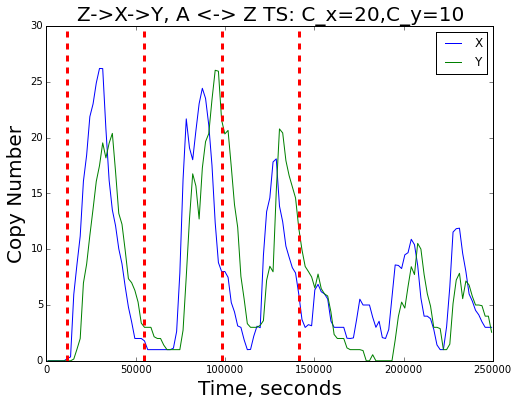

num matching results is  1


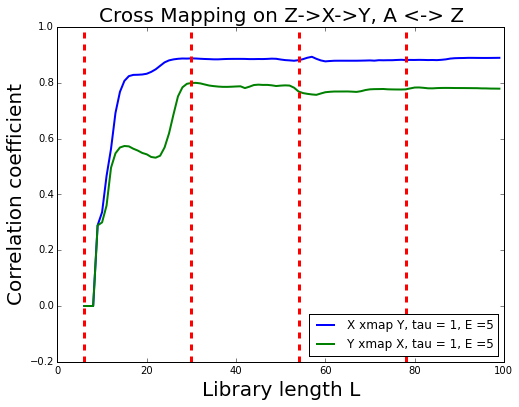

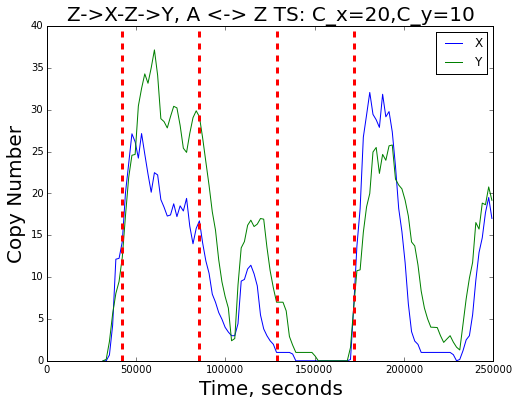

num matching results is  1


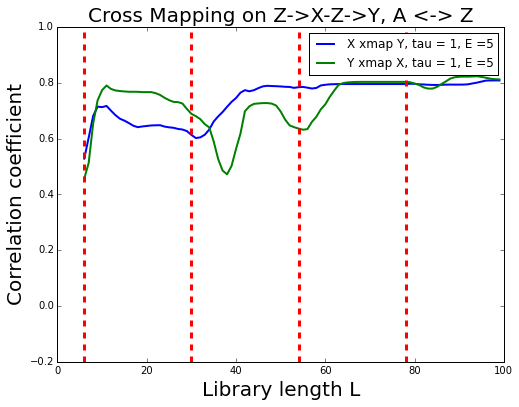

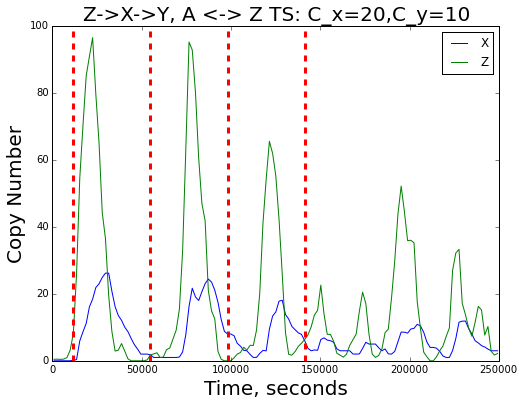

num matching results is  1


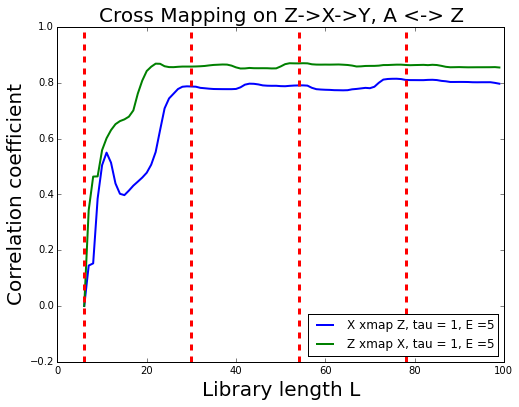

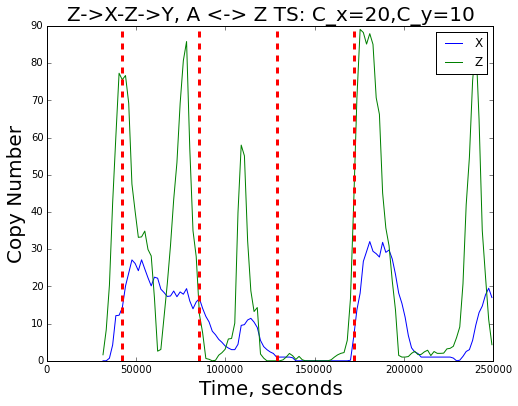

num matching results is  1


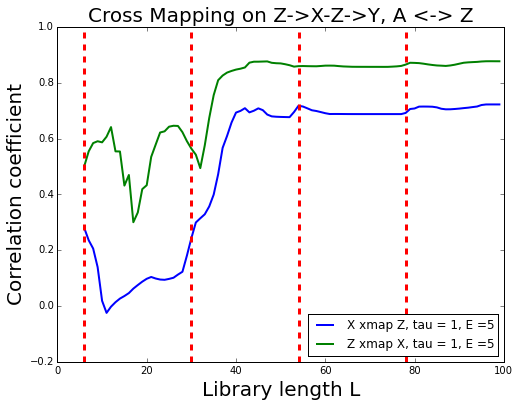

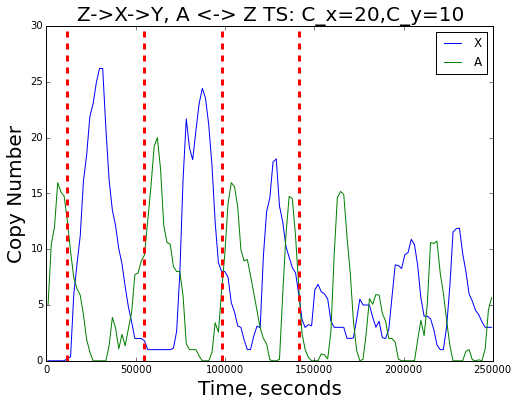

num matching results is  1


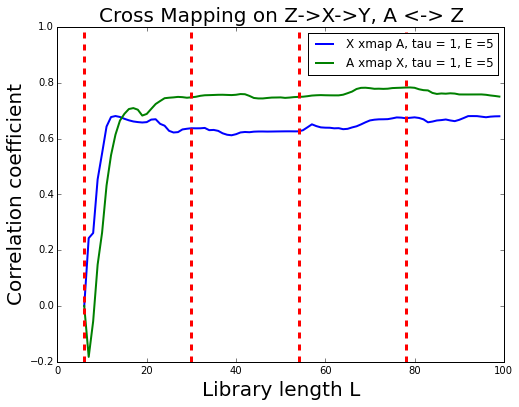

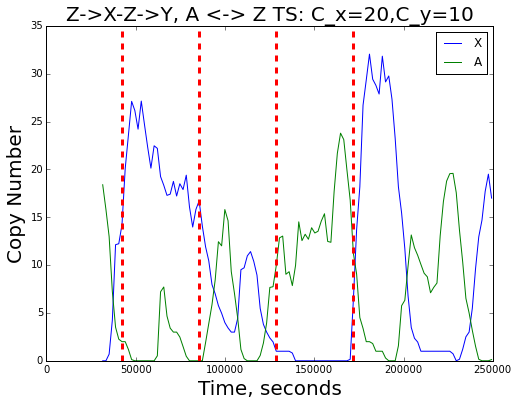

num matching results is  1


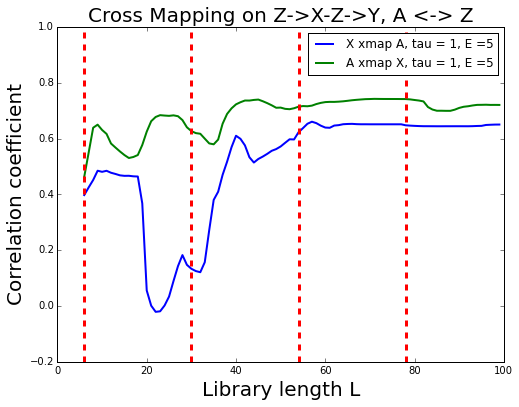

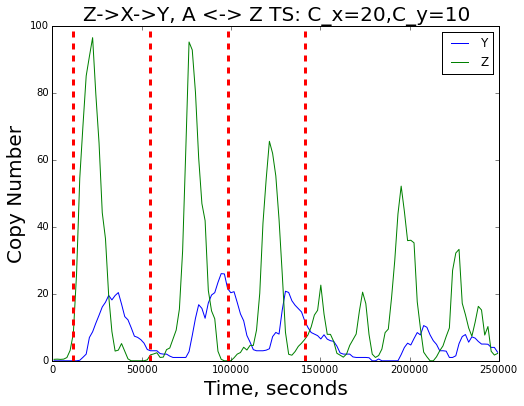

num matching results is  1


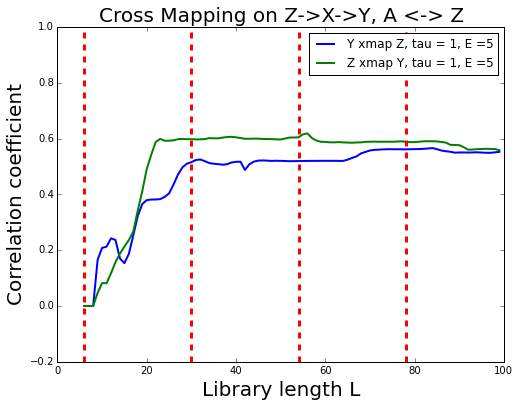

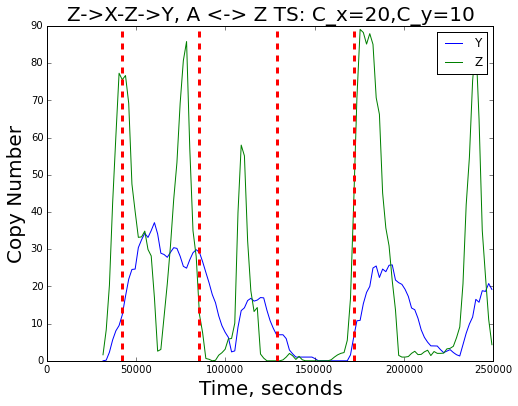

num matching results is  1


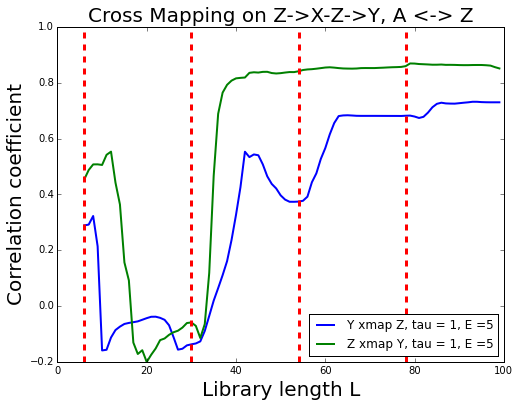

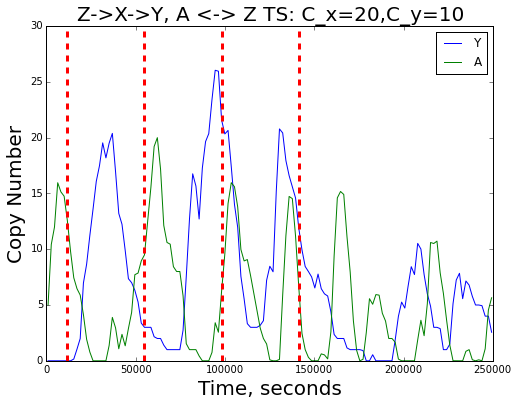

num matching results is  1


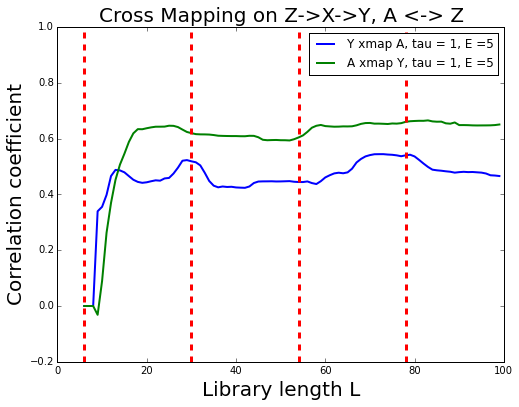

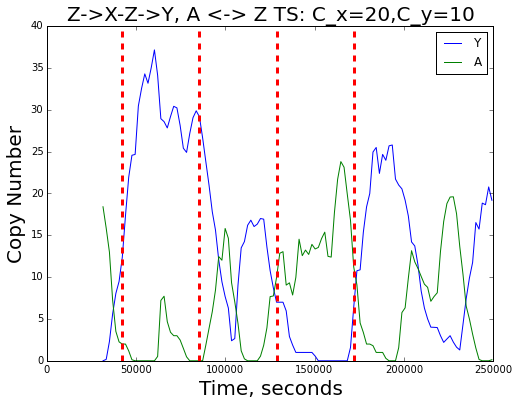

num matching results is  1


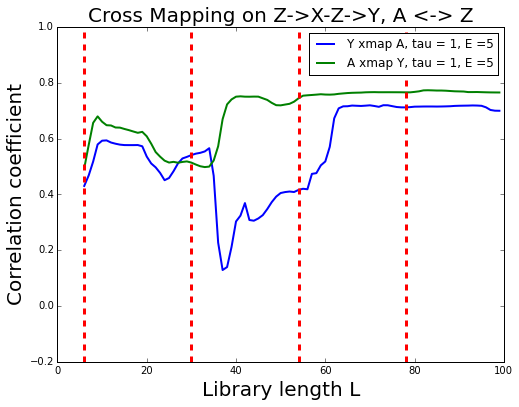

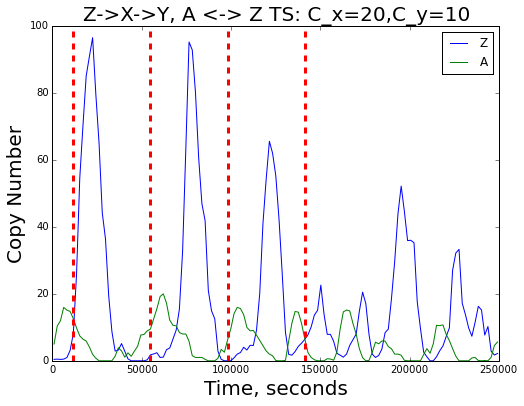

num matching results is  1


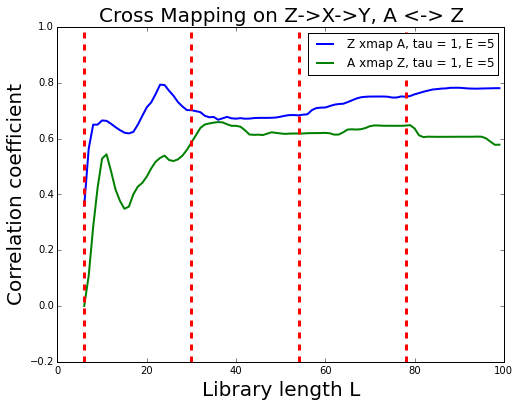

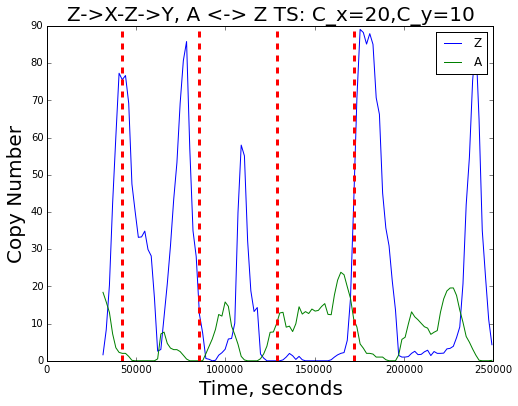

num matching results is  1


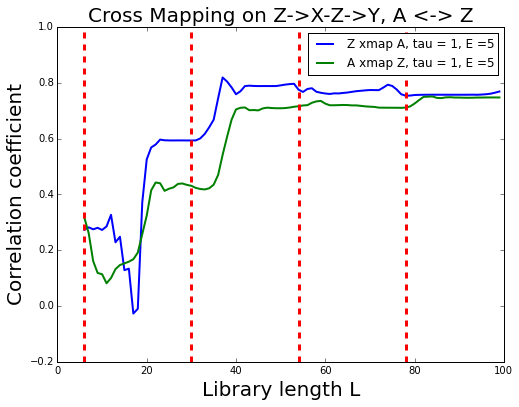

In [33]:
# Plot: CCM convergence for just each

# For each X, Y pair
# for each model
# plot the original time series
# plot both directions of the CCM

import collections
import pickle
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))

CCM_results = pickle.load(open(CCM_avg_result_name, 'rb'))

# Copying previous parameters, ONLY FOR NAMING THE FIGURES



for gene_pair in itertools.combinations(genes, 2):


    for i in range(len(models)):
        model = models[i]
        

        
        smod, newdictToVector, times = avg_result_dict[model]
        # plot the original thing

        min_time =  model_start_times[i]
       
        specieslist = gene_pair
        time_index = np.nonzero(times > max_time)[0][0]
        min_time_index = np.nonzero(times > min_time)[0][0]
        plt.figure(figsize=(8,6))
        for species in specieslist:
            plt.plot(times[min_time_index :time_index], newdictToVector[species][min_time_index:time_index], label=species)
        for plot_L in plot_Ls:
            plt.axvline(times[min_time_index + plot_L], color='r', ls = '--', linewidth=3)
            
        plt.xlabel("Time, seconds", fontsize=20)
        plt.ylabel("Copy Number", fontsize=20)
        plt.title(model + ", A <-> Z TS: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items() if key != 'alpha_z']), fontsize=20)
        plt.legend()
        plt.show()

            # PLOT BOTH DIRECTIONS OF CCM


        avg_result_1 = [g for g in CCM_results if g[0] == gene_pair[0] and g[1] == gene_pair[1] and g[2] == model]
        avg_result_2 = [g for g in CCM_results if g[0] == gene_pair[1] and g[1] == gene_pair[0] and g[2] == model]

        print "num matching results is ", len(avg_result_1)

        plt.figure(figsize=(8,6))
        
        Ls_1 = avg_result_1[0][6]
        rhos_1 = avg_result_1[0][5]
        Ls_2 = avg_result_2[0][6]
        rhos_2 = avg_result_2[0][5]
        plt.plot(Ls_1, rhos_1, color='blue', linewidth=2, label = gene_pair[0] + " xmap " + gene_pair[1] + ", tau = " + str(avg_result_1[0][3]) + ", E =" + str(avg_result_1[0][4]))
        plt.plot(Ls_2, rhos_2, color='green', linewidth=2, label= gene_pair[1] + " xmap " + gene_pair[0] + ", tau = " + str(avg_result_2[0][3]) + ", E =" + str(avg_result_2[0][4]))
        for plot_L in plot_Ls:
            plt.axvline(plot_L, color='r', ls = '--', linewidth=3)
        plt.xlabel("Library length L", fontsize=20)
        plt.ylabel("Correlation coefficient", fontsize =20)
        plt.title("Cross Mapping on " + model + ", A <-> Z", fontsize=20)
        plt.legend(loc='best')
        plt.ylim(-0.2, 1)
        plt.show()




# Save the avg result file to time series file

In [17]:
avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))

print avg_result_dict.keys()

models = avg_result_dict.keys()

['Z->X->Y', 'Z->X-Z->Y']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


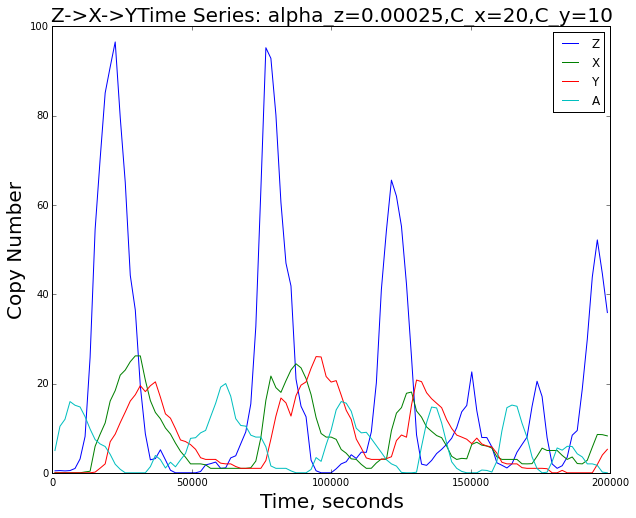

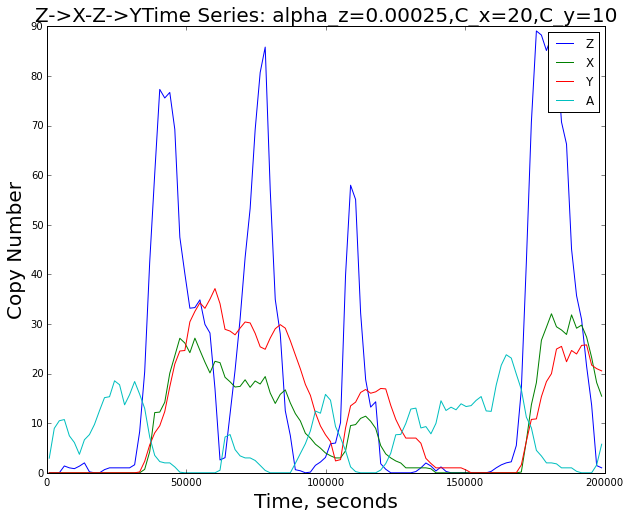

In [34]:

for model in models:
    smod, new_newdictToVector, new_times = avg_result_dict[model]
    
    max_time = 200000
    min_time =  0
    specieslist = ['Z', 'X', 'Y', 'A']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species)
    plt.xlabel("Time, seconds", fontsize=20)
    plt.ylabel("Copy Number", fontsize=20)
    plt.title(model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()]), fontsize=20)
    plt.legend()
    plt.show()

In [23]:
from scipy.spatial import cKDTree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_lagged_vector(X_list, index, tau, E):
    """Generate lagged vector of X: (X[index], X[index - tau], ..., X[index - tau*E - 1]).
    
    :param X_list: list of X observations at equally spaced time intervals.
    :param index: index to start from
    :param tau: time lag
    :param E: dimension of lagged vector
    
    :return: (X[index], X[index - tau], ..., X[index - tau*E - 1])
    """
    return [X_list[index - e * tau] for e in range(E)]

def get_CCM(X_list, Y_list, L, tau=2, E=3, test_indices=None, num_test=100, use_same=True):
    """
    Compute the correlation coeffiicent of using X's cross-mapped estimates to
    predict Y at the test_indices.
    
    :param X_list: list of X observations
    :param Y_list: list of Y observations
    :param L: Library length, i.e. number of X/Y observations to use to construct manifold for estiamtion
    :param  tau: Time lag of lagged vecotr
    :param E: dimesnion of lagged vector
    :param test_indices: indices of Y to estimate. All shou be > than L. Default is random.
    :param num_test: number of indeces to test if random
    :param use_same: If we find an X that has the exact value of the test X, then use only those Xs to generate estiamtes of Y
    
    :return: rho, the correlation coefficient of the estimates and true alues
    
    Workflow
    1 ) make all lagged vectors
    2) assign first L - first_lag to train, in kdtree
    3) predict by taking test_indices, convert
    4) find closets tin lag tree
    5) calculate weights
    6) get indices in old
    7) make estimate
    """

    length = len(X_list)
    first_lag = tau * (E - 1)
    
    train_indices = np.arange(first_lag, L)
    other_indices = np.arange(L, length)
    all_indices = np.arange(first_lag, length)
    if test_indices == None:
        test_indices = np.random.choice(other_indices, num_test, replace=False)

    # make all lagged vectors
    x_lag_list = np.array([get_lagged_vector(X_list, i, tau, E) for i in all_indices])
    y_lag_list = np.array([get_lagged_vector(X_list, i, tau, E) for i in all_indices])

    
    # put training X and Y (used for estimation) into kdtree for nearest neighbors seaerch
    x_lag_train = x_lag_list[np.ix_(train_indices - first_lag)]

    x_lagtree = cKDTree(x_lag_train, leafsize=100)

    
    
    
    Y_target = Y_list[test_indices]                                
    Y_ests = []
    
    # generate each estimate
    for k in range(len(test_indices)):
        test_index = test_indices[k]
        # for each t, find contemporaneous x[t]
        x_lag = x_lag_list[test_index - first_lag]
        

        
        # Find e+1 nearest neighbors, Calculate distances    
        distances, indices = x_lagtree.query(x_lag, k=E+1)
        min_dist = min(distances)

        
        # Case 1: we find an X that has the exact same value as the test X
        # In this case, use only those Xs that have same value as test X, and take 
        # the average of Ys
        if (use_same and min_dist == 0) or all([dist == 0 for dist in distances]):
            zipped = zip(*[(dist, i) for dist, i in zip(distances, indices) if dist == 0])
            distances, indices = zipped[0], zipped[1]
            weights = [1.0 / len(distances)] * len(distances)
            Y_est = sum([weight * Y_list[i + first_lag] for weight, i in zip(weights, indices)])
        
        # Case 2: all Xs are different
        # Use exponential weighting as in paper
        else:
            zipped = zip(*[(dist, i) for dist, i in zip(distances, indices) if dist != 0])
            distances, indices = zipped[0], zipped[1]
            min_dist = min(distances)
        
            # Calculate weights
            weights = np.array([np.exp(-dist * 1.0/ min_dist) for dist in distances])

            weights /= sum(weights)
        
            # generate estimate y^
            Y_est = sum([weight * Y_list[i + first_lag] for weight, i in zip(weights, indices)])
        
        Y_ests.append(Y_est)
    
    rho = np.corrcoef(Y_ests, Y_target)[0][1]

    
    return rho


def get_CCM_complete(X_list, Y_list, Ls, tau=2, E=3, test_indices=None, num_test=100, use_same=True):
    """
    :param X_list: list of X observations
    :param Y_list: list of Y observations
    :param Ls: Library lengths, i.e. number of X/Y observations to use to construct manifold for estiamtion
    :param  tau: Time lag of lagged vecotr
    :param E: dimesnion of lagged vector
    :param test_indices: indices of Y to estimate. All shou be > than L. Default is random.
    :param num_test: number of indeces to test if random
    :param use_same: If we find an X that has the exact value of the test X, then use only those Xs to generate estiamtes of Y
    
    :return: rhos, the correlation coefficient for each value of L
    """
    
    
    rhos = [get_CCM(X_list, Y_list, L, tau=tau, E=E, test_indices=test_indices, num_test=num_test, use_same=use_same)
           for L in Ls]
    for i in range(len(rhos)):
        if np.isnan(rhos[i]):
            rhos[i] = 0
    
    return rhos, Ls


# Random plots for presentation 9/22/16

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


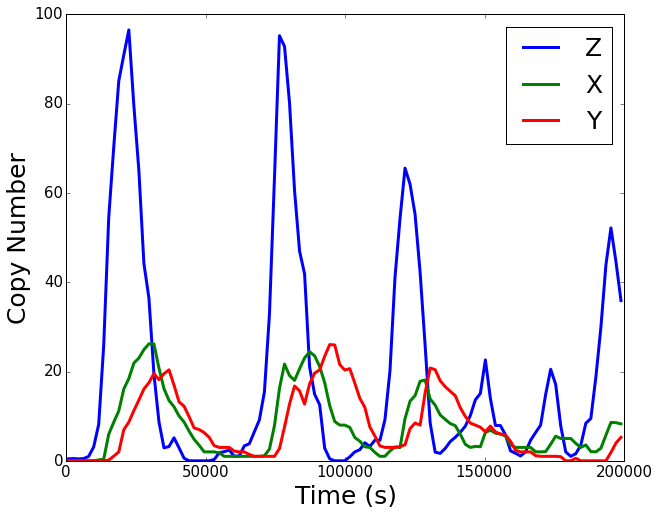

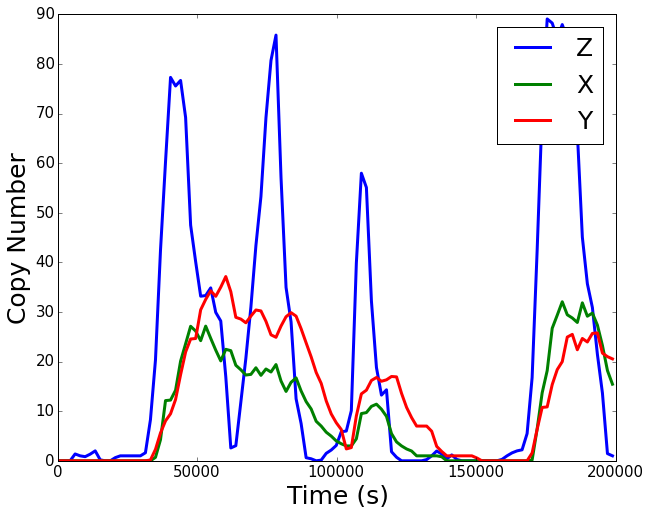

In [12]:
# special plotting for presentation 9_22_16

models = ["Z->X->Y", "Z->X-Z->Y"]

for model in models:
    smod, newdictToVector, times = result_dict[model]


    new_newdictToVector = {}
    for key in newdictToVector:
        value = newdictToVector[key]
        split_value = np.split(value, np.arange(0, len(times), index_interval))
        new_newdictToVector[key] = np.array([np.sum(split_val) * 1.0 /np.shape(split_val)[0] for split_val in split_value])


    split_times = np.split(times, np.arange(0, len(times), index_interval))
    new_times = np.array([np.sum(split_time) * 1.0 /np.shape(split_time)[0] for split_time in split_times])

    avg_result_dict[model] = smod, new_newdictToVector, new_times


    max_time = 200000
    min_time =  0
    specieslist = ['Z', 'X', 'Y']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species, linewidth=3)
    plt.xlabel("Time (s)", fontsize=25)
    plt.ylabel("Copy Number", fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    #title = model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()])
    title = ""
    plt.title(title, fontsize=20)
    plt.legend(prop={'size':25})
    plt.show()
    

    #pickle.dump(avg_result_dict, open(avg_result_file_name, 'wb'))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


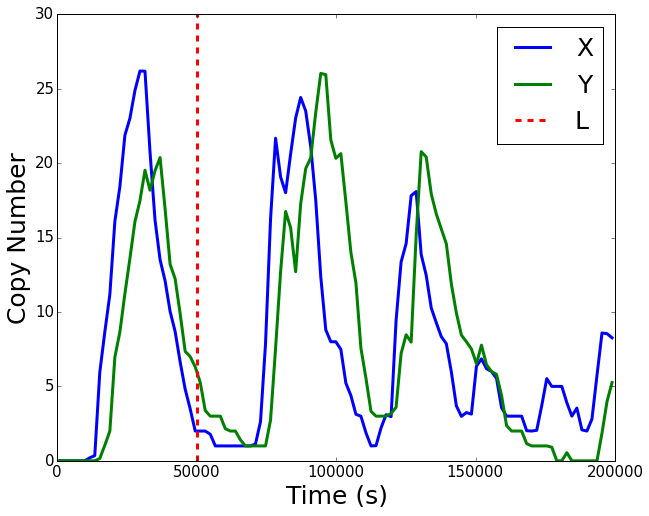

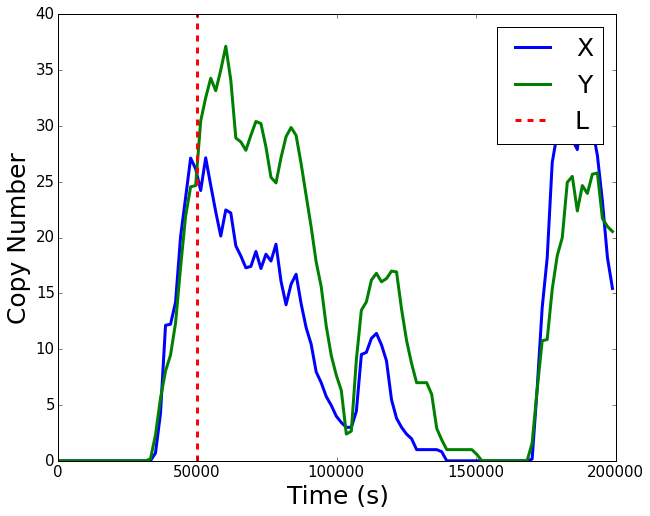

In [16]:
# special plotting for presentation 9_22_16

models = ["Z->X->Y", "Z->X-Z->Y"]

for model in models:
    smod, newdictToVector, times = result_dict[model]


    new_newdictToVector = {}
    for key in newdictToVector:
        value = newdictToVector[key]
        split_value = np.split(value, np.arange(0, len(times), index_interval))
        new_newdictToVector[key] = np.array([np.sum(split_val) * 1.0 /np.shape(split_val)[0] for split_val in split_value])


    split_times = np.split(times, np.arange(0, len(times), index_interval))
    new_times = np.array([np.sum(split_time) * 1.0 /np.shape(split_time)[0] for split_time in split_times])

    avg_result_dict[model] = smod, new_newdictToVector, new_times


    max_time = 200000
    min_time =  0
    specieslist = ['X', 'Y']
    time_index = np.nonzero(new_times > max_time)[0][0]
    min_time_index = np.nonzero(new_times > min_time)[0][0]
    plt.figure(figsize=(10,8))
    for species in specieslist:
        plt.plot(new_times[min_time_index :time_index], new_newdictToVector[species][min_time_index:time_index], label=species, linewidth=3)
    plt.xlabel("Time (s)", fontsize=25)
    plt.ylabel("Copy Number", fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x=50000, linestyle='dashed', color='red', linewidth='3', label="L")

    #title = model + "Time Series: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items()])
    title = ""
    plt.title(title, fontsize=20)
    plt.legend(prop={'size':25})
    plt.show()
    

    #pickle.dump(avg_result_dict, open(avg_result_file_name, 'wb'))

In [28]:

CCM_avg_result_name = "CCM_ZXYA_tau1_E_5.p"

models = ["Z->X->Y", "Z->X-Z->Y"]
Ls = np.arange(6, 100, 1)
rand_state = 123
num_test = 1000
taus = np.arange(1,2)
Es = np.arange(5, 6)
model_start_times = [0, 30000]
genes = ["X", "Y", "Z"]

In [ ]:
# Plot: CCM convergence for just each

# For each X, Y pair
# for each model
# plot the original time series
# plot both directions of the CCM

import collections
import pickle
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

avg_result_dict = pickle.load(open(avg_result_file_name, 'rb'))

CCM_results = pickle.load(open(CCM_avg_result_name, 'rb'))

# Copying previous parameters, ONLY FOR NAMING THE FIGURES

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater


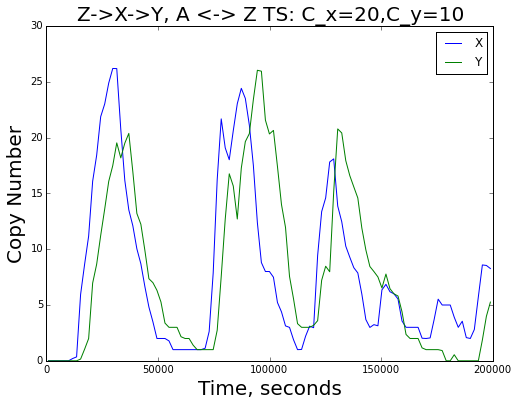

num matching results is  1


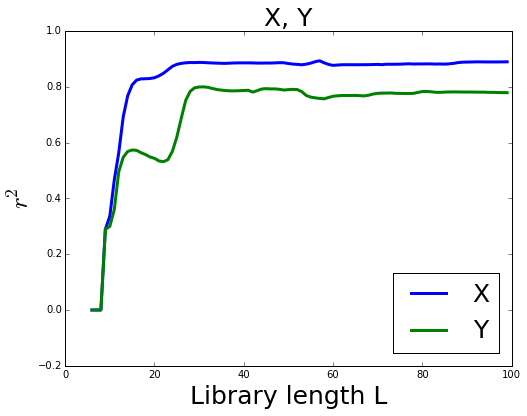

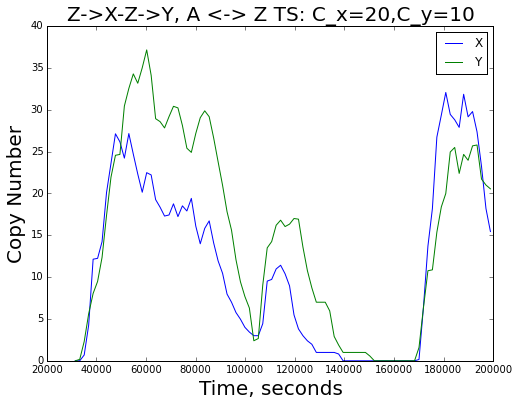

num matching results is  1


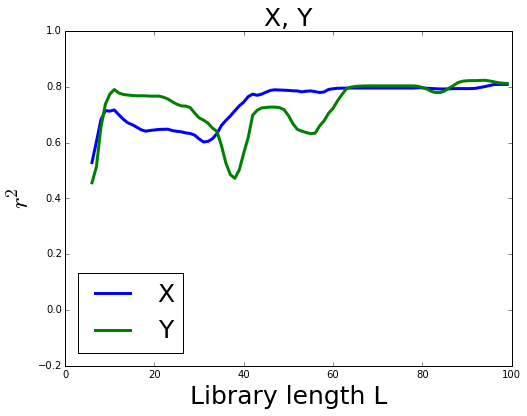

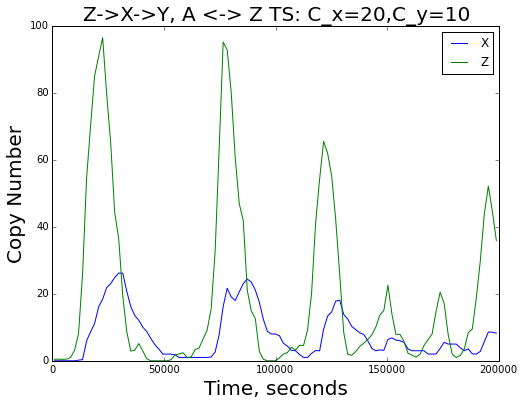

num matching results is  1


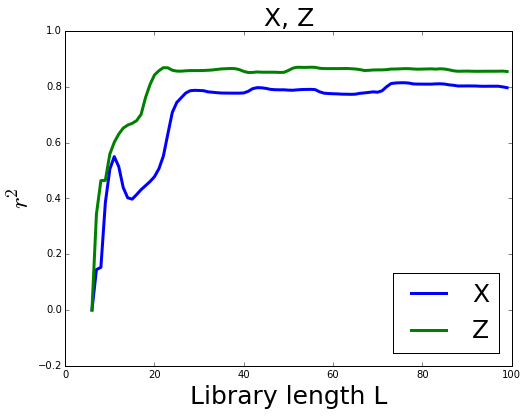

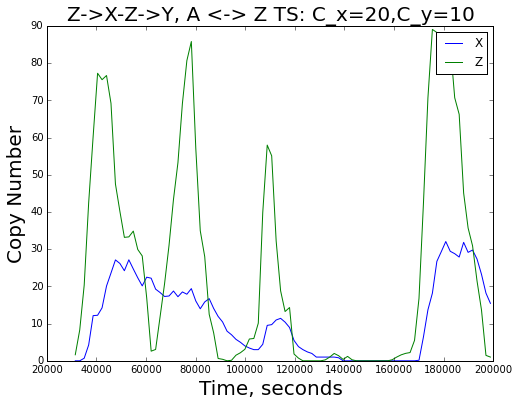

num matching results is  1


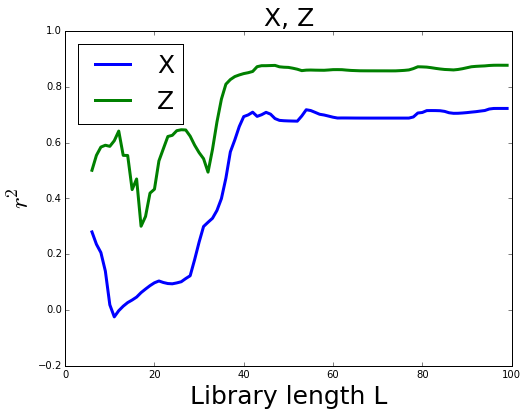

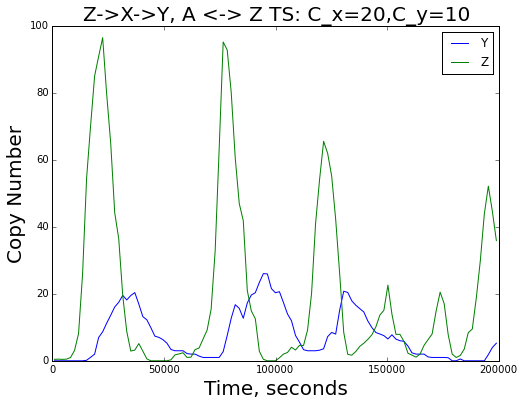

num matching results is  1


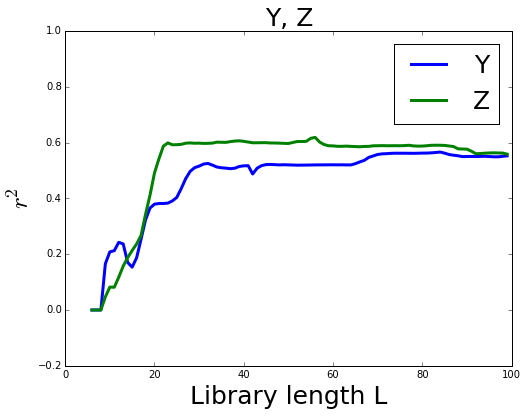

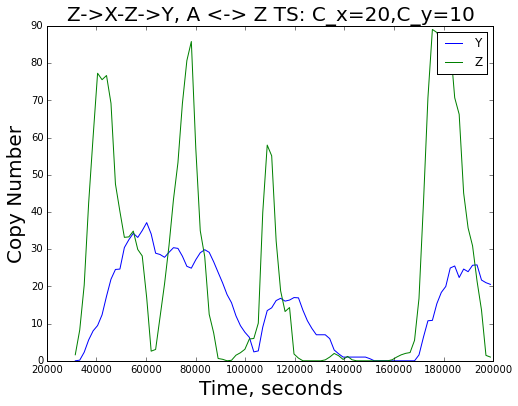

num matching results is  1


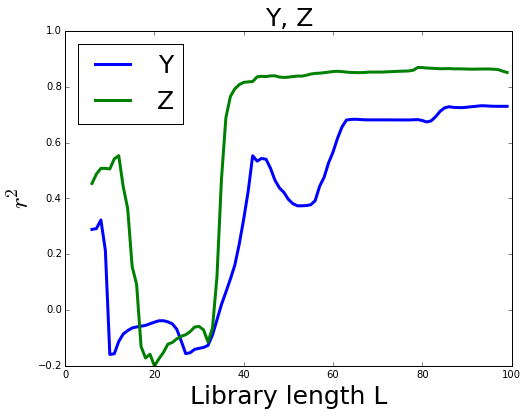

In [30]:
# NOTE THE LABELS ARE WRONG FOR THIS CELLL!!!
# ON PURPSE ONLY TOY EXAMPLE

for gene_pair in itertools.combinations(genes, 2):


    for i in range(len(models)):
        model = models[i]
        

        
        smod, newdictToVector, times = avg_result_dict[model]
        # plot the original thing

        min_time =  model_start_times[i]
       
        specieslist = gene_pair
        time_index = np.nonzero(times > max_time)[0][0]
        min_time_index = np.nonzero(times > min_time)[0][0]
        plt.figure(figsize=(8,6))
        for species in specieslist:
            plt.plot(times[min_time_index :time_index], newdictToVector[species][min_time_index:time_index], label=species)
#         for plot_L in plot_Ls:
#             plt.axvline(times[min_time_index + plot_L], color='r', ls = '--', linewidth=3)
            
        plt.xlabel("Time, seconds", fontsize=20)
        plt.ylabel("Copy Number", fontsize=20)
        plt.title(model + ", A <-> Z TS: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items() if key != 'alpha_z']), fontsize=20)
        plt.legend()
        plt.show()

            # PLOT BOTH DIRECTIONS OF CCM


        avg_result_1 = [g for g in CCM_results if g[0] == gene_pair[0] and g[1] == gene_pair[1] and g[2] == model]
        avg_result_2 = [g for g in CCM_results if g[0] == gene_pair[1] and g[1] == gene_pair[0] and g[2] == model]

        print "num matching results is ", len(avg_result_1)

        plt.figure(figsize=(8,6))
        
        Ls_1 = avg_result_1[0][6]
        rhos_1 = avg_result_1[0][5]
        Ls_2 = avg_result_2[0][6]
        rhos_2 = avg_result_2[0][5]
        plt.plot(Ls_1, rhos_1, color='blue', linewidth=3, label = gene_pair[0])
        plt.plot(Ls_2, rhos_2, color='green', linewidth=3, label= gene_pair[1])
#         for plot_L in plot_Ls:
#             plt.axvline(plot_L, color='r', ls = '--', linewidth=3)
        plt.xlabel("Library length L", fontsize=25)
        plt.ylabel("$r^2$", fontsize =25)
        plt.title(str(", ".join(sorted(gene_pair))), fontsize=25)
        plt.legend(loc='best', prop={'size':25})
        plt.ylim(-0.2, 1)
        plt.show()

In [32]:
gene2color = {"X": "green", "Z":"blue", "Y": "red"}

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater


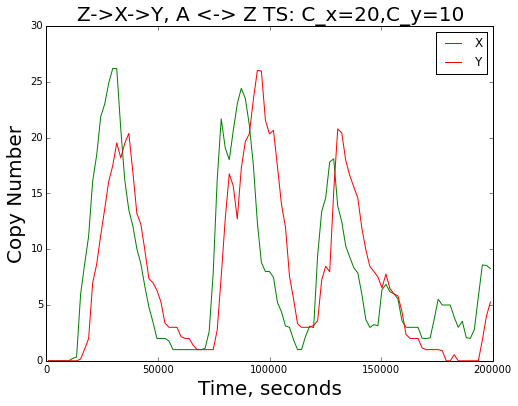

num matching results is  1


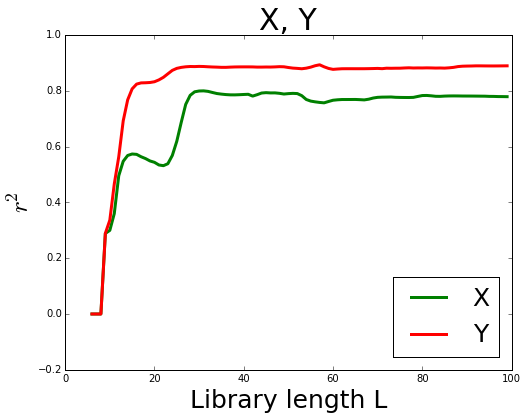

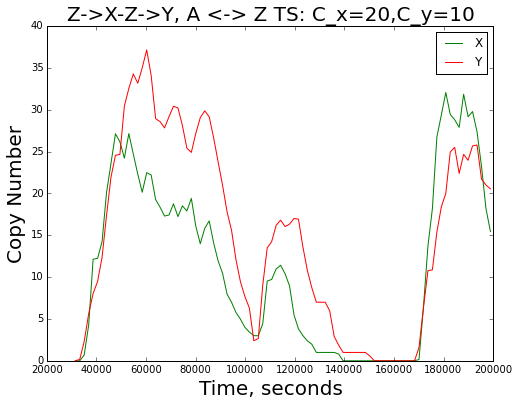

num matching results is  1


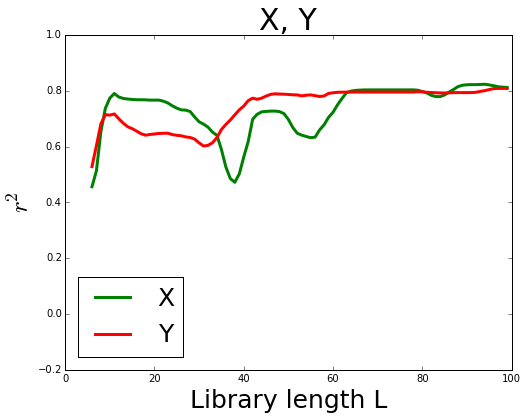

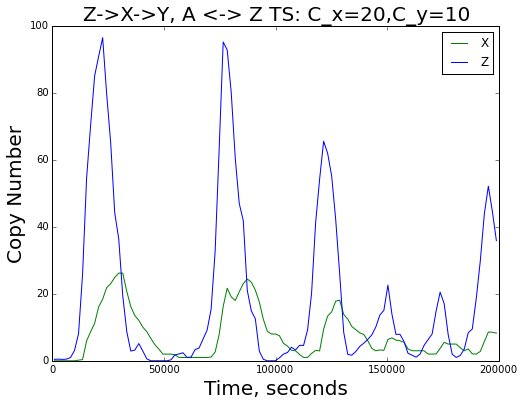

num matching results is  1


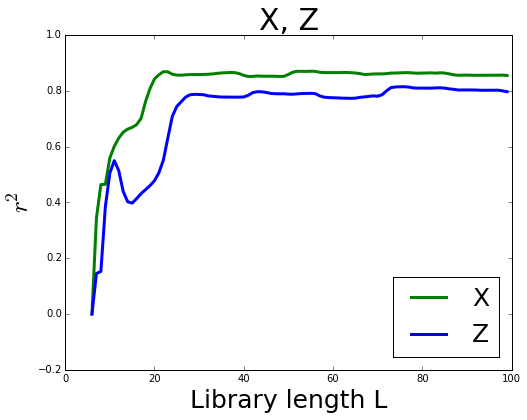

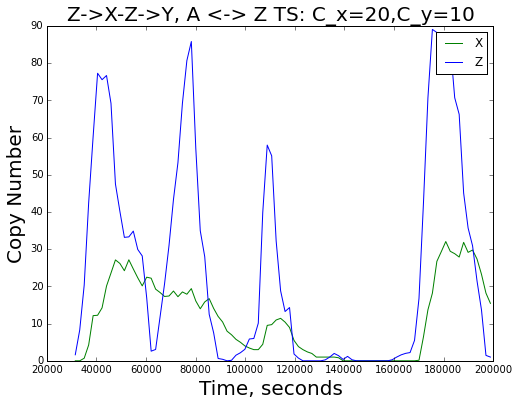

num matching results is  1


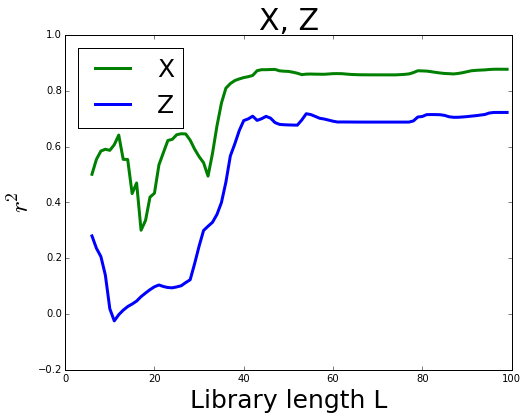

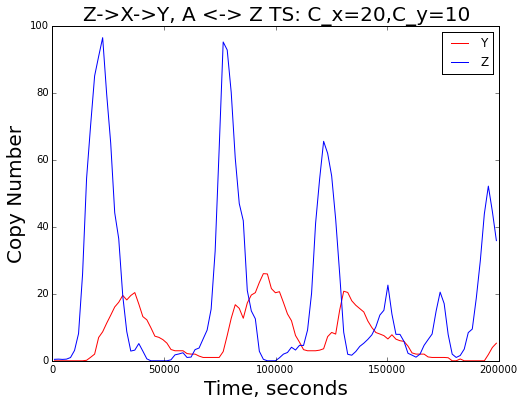

num matching results is  1


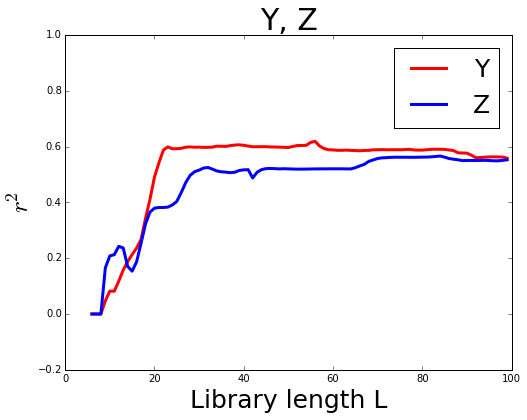

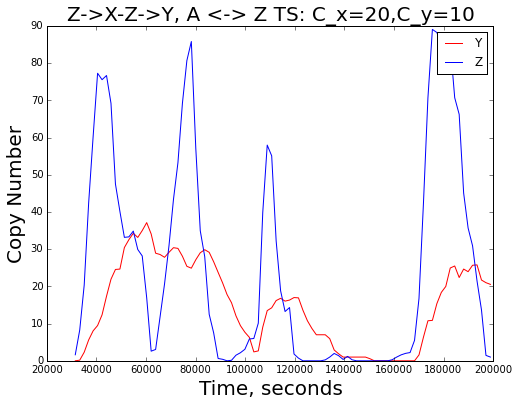

num matching results is  1


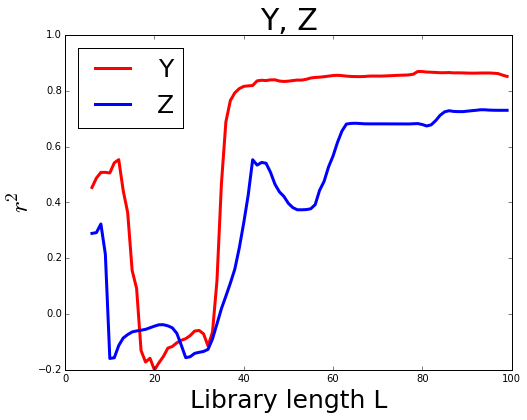

In [38]:
# NOTE THE LABELS ARE WRONG FOR THIS CELLL!!!
# ON PURPSE ONLY TOY EXAMPLE

for gene_pair in itertools.combinations(genes, 2):


    for i in range(len(models)):
        model = models[i]
        

        
        smod, newdictToVector, times = avg_result_dict[model]
        # plot the original thing

        min_time =  model_start_times[i]
       
        specieslist = gene_pair
        time_index = np.nonzero(times > max_time)[0][0]
        min_time_index = np.nonzero(times > min_time)[0][0]
        plt.figure(figsize=(8,6))
        for species in specieslist:
            plt.plot(times[min_time_index :time_index], newdictToVector[species][min_time_index:time_index], label=species, color =gene2color[species])
#         for plot_L in plot_Ls:
#             plt.axvline(times[min_time_index + plot_L], color='r', ls = '--', linewidth=3)
            
        plt.xlabel("Time, seconds", fontsize=20)
        plt.ylabel("Copy Number", fontsize=20)
        plt.title(model + ", A <-> Z TS: " + ",".join(["=".join([str(key), str(value)]) for key, value in paramDict.items() if key != 'alpha_z']), fontsize=20)
        plt.legend()
        plt.show()

            # PLOT BOTH DIRECTIONS OF CCM


        avg_result_1 = [g for g in CCM_results if g[0] == gene_pair[0] and g[1] == gene_pair[1] and g[2] == model]
        avg_result_2 = [g for g in CCM_results if g[0] == gene_pair[1] and g[1] == gene_pair[0] and g[2] == model]

        print "num matching results is ", len(avg_result_1)

        plt.figure(figsize=(8,6))
        
        Ls_1 = avg_result_1[0][6]
        rhos_1 = avg_result_1[0][5]
        Ls_2 = avg_result_2[0][6]
        rhos_2 = avg_result_2[0][5]
        if gene_pair[1] < gene_pair[0]:
            plt.plot(Ls_1, rhos_1, color =gene2color[gene_pair[1]], linewidth=3, label = gene_pair[1])
            plt.plot(Ls_2, rhos_2, color =gene2color[gene_pair[0]], linewidth=3, label= gene_pair[0])
        else:
            plt.plot(Ls_2, rhos_2, color =gene2color[gene_pair[0]], linewidth=3, label= gene_pair[0])
            plt.plot(Ls_1, rhos_1, color =gene2color[gene_pair[1]], linewidth=3, label = gene_pair[1])
                    #         for plot_L in plot_Ls:
#             plt.axvline(plot_L, color='r', ls = '--', linewidth=3)
        plt.xlabel("Library length L", fontsize=25)
        plt.ylabel("$r^2$", fontsize =25)
        plt.title(str(", ".join(sorted(gene_pair))), fontsize=30)
        plt.legend(loc='best', prop={'size':25})
        plt.ylim(-0.2, 1)
        plt.show()

In [36]:
"X" < "Z"

True